In [105]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [106]:
# кількість бруду у відсотках
dirt_amount = ctrl.Antecedent(np.arange(0, 11, 1), 'Кількість бруду')

# маленьке навантаження до 3 кг, середнє 3-6 кг, велике 6+ кг
load_size = ctrl.Antecedent(np.arange(0, 7, 1), 'Кількість білизни')

# Вимірюється в мг/л кальцію. Наприклад, м'яка < 60, середня 60-120, жорстка >120
water_hardness = ctrl.Antecedent(np.arange(0, 121, 1), 'Якість води')

In [107]:
dirt_amount.universe, load_size.universe, water_hardness.universe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]))

In [ ]:
#  defuzzify_method='centroid', 'bisector', 'mom', 'som', 'lom'
wash_time = ctrl.Consequent(np.arange(0, 121, 1), 'Час прання')
wash_time.defuzzify_method = 'centroid'

In [109]:
wash_time.universe

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [110]:
# Час прання
wash_time['Very_Short'] = fuzz.trimf(wash_time.universe, [0, 0, 30])
wash_time['Short'] = fuzz.trimf(wash_time.universe, [20, 45, 60])
wash_time['Medium'] = fuzz.trimf(wash_time.universe, [40, 60, 80])
wash_time['Long'] = fuzz.trimf(wash_time.universe, [60, 90, 120])
wash_time['Very_Long'] = fuzz.trimf(wash_time.universe, [90, 120, 120])


# Кількість бруду
dirt_amount['Low'] = fuzz.trimf(dirt_amount.universe, [0, 0, 5])
dirt_amount['Medium'] = fuzz.trimf(dirt_amount.universe, [0, 5, 10])
dirt_amount['High'] = fuzz.trimf(dirt_amount.universe, [5, 10, 10])

# Кількість білизни
load_size['Small'] = fuzz.trimf(load_size.universe, [0, 0, 3])
load_size['Medium'] = fuzz.trimf(load_size.universe, [0, 3, 6])
load_size['Large'] = fuzz.trimf(load_size.universe, [3, 6, 6])

# Якість води
water_hardness['Soft'] = fuzz.trimf(water_hardness.universe, [0, 0, 60])
water_hardness['Medium'] = fuzz.trimf(water_hardness.universe, [0, 60, 120])
water_hardness['Hard'] = fuzz.trimf(water_hardness.universe, [60, 120, 120])

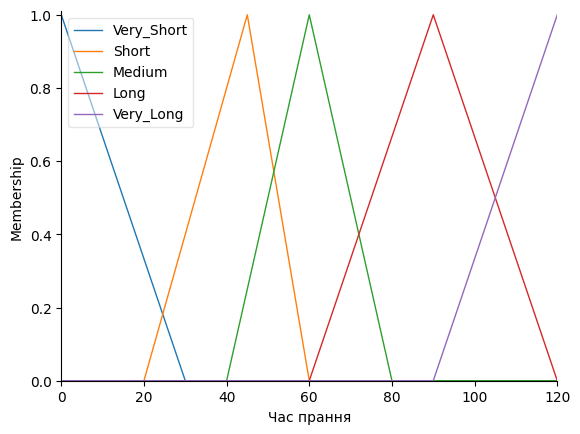

In [111]:
wash_time.view()

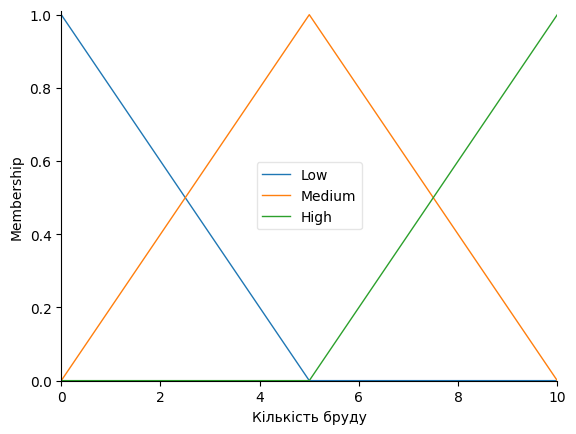

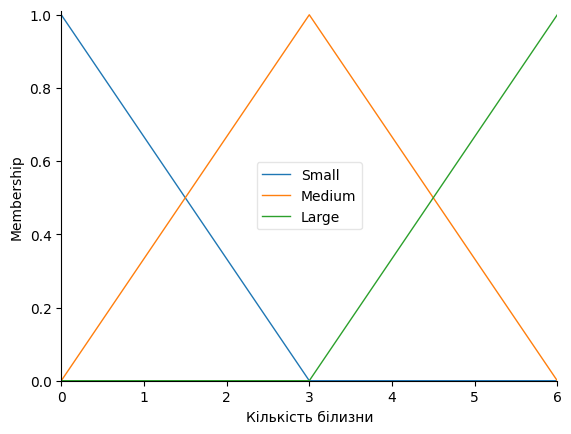

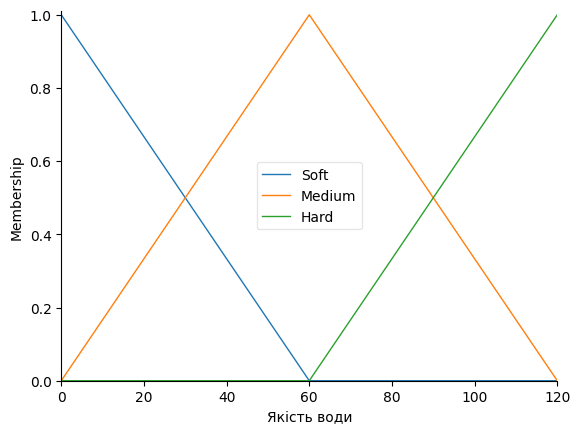

In [112]:
dirt_amount.view()
load_size.view()
water_hardness.view()

In [113]:
#Rules
control_system = ctrl.ControlSystem([
    # Правила для легкого бруду
    ctrl.Rule(dirt_amount['Low'] & load_size['Small'] & water_hardness["Soft"], wash_time['Very_Short']), 
    ctrl.Rule(dirt_amount['Low'] & load_size['Small'] & water_hardness["Medium"], wash_time['Very_Short']), 
    ctrl.Rule(dirt_amount['Low'] & load_size['Small'] & water_hardness["Hard"], wash_time['Short']), 
    
    ctrl.Rule(dirt_amount['Low'] & load_size['Medium'] & water_hardness["Soft"], wash_time['Short']), 
    ctrl.Rule(dirt_amount['Low'] & load_size['Medium'] & water_hardness["Medium"], wash_time['Short']), 
    ctrl.Rule(dirt_amount['Low'] & load_size['Medium'] & water_hardness["Hard"], wash_time['Medium']), 
    
    ctrl.Rule(dirt_amount['Low'] & load_size['Large'] & water_hardness["Soft"], wash_time['Medium']), 
    ctrl.Rule(dirt_amount['Low'] & load_size['Large'] & water_hardness["Medium"], wash_time['Medium']), 
    ctrl.Rule(dirt_amount['Low'] & load_size['Large'] & water_hardness["Hard"], wash_time['Long']), 
    
    # Правила для середнього бруду
    ctrl.Rule(dirt_amount['Medium'] & load_size['Small'] & water_hardness["Soft"], wash_time['Short']), 
    ctrl.Rule(dirt_amount['Medium'] & load_size['Small'] & water_hardness["Medium"], wash_time['Medium']), 
    ctrl.Rule(dirt_amount['Medium'] & load_size['Small'] & water_hardness["Hard"], wash_time['Medium']), 
    
    ctrl.Rule(dirt_amount['Medium'] & load_size['Medium'] & water_hardness["Soft"], wash_time['Medium']), 
    ctrl.Rule(dirt_amount['Medium'] & load_size['Medium'] & water_hardness["Medium"], wash_time['Long']), 
    ctrl.Rule(dirt_amount['Medium'] & load_size['Medium'] & water_hardness["Hard"], wash_time['Long']), 
    
    ctrl.Rule(dirt_amount['Medium'] & load_size['Large'] & water_hardness["Soft"], wash_time['Long']), 
    ctrl.Rule(dirt_amount['Medium'] & load_size['Large'] & water_hardness["Medium"], wash_time['Very_Long']), 
    ctrl.Rule(dirt_amount['Medium'] & load_size['Large'] & water_hardness["Hard"], wash_time['Very_Long']), 
    
    # Правила для важкого бруду
    ctrl.Rule(dirt_amount['High'] & load_size['Small'] & water_hardness["Soft"], wash_time['Medium']), 
    ctrl.Rule(dirt_amount['High'] & load_size['Small'] & water_hardness["Medium"], wash_time['Long']), 
    ctrl.Rule(dirt_amount['High'] & load_size['Small'] & water_hardness["Hard"], wash_time['Long']), 
    
    ctrl.Rule(dirt_amount['High'] & load_size['Medium'] & water_hardness["Soft"], wash_time['Long']), 
    ctrl.Rule(dirt_amount['High'] & load_size['Medium'] & water_hardness["Medium"], wash_time['Very_Long']), 
    ctrl.Rule(dirt_amount['High'] & load_size['Medium'] & water_hardness["Hard"], wash_time['Very_Long']), 
    
    ctrl.Rule(dirt_amount['High'] & load_size['Large'] & water_hardness["Soft"], wash_time['Very_Long']), 
    ctrl.Rule(dirt_amount['High'] & load_size['Large'] & water_hardness["Medium"], wash_time['Very_Long']), 
    ctrl.Rule(dirt_amount['High'] & load_size['Large'] & water_hardness["Hard"], wash_time['Very_Long']), 
    
    ])

Control system

In [114]:
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

82.50315476028362


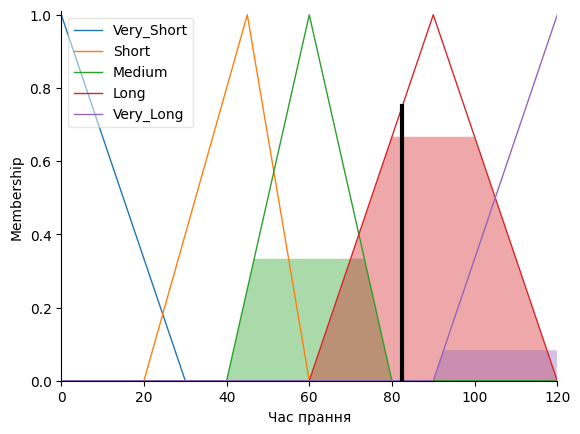

In [115]:
fuzzy_system.input['Кількість бруду'] = 5
fuzzy_system.input['Кількість білизни'] = 5
fuzzy_system.input['Якість води'] = 5

fuzzy_system.compute()
print(fuzzy_system.output['Час прання'])
wash_time.view(sim = fuzzy_system)

In [157]:
da = [0, 4, 8]
ls = [1, 2, 5]
wh = [16, 57, 115]

results = []
for i in range(3):
    print("\n\n======================")
    for j in range(3):
        print("\n")
        for k in range(3):
            fuzzy_system.input['Кількість бруду'] = da[i]
            fuzzy_system.input['Кількість білизни'] = ls[j]
            fuzzy_system.input['Якість води'] = wh[k]

            fuzzy_system.compute()
            print(fuzzy_system.output['Час прання'], end="\t")





24.428871060772913	24.428871060772913	45.64358192179198	

32.4853337250869	32.4853337250869	50.16736067958509	

53.044485303506264	53.044485303506264	79.99229507627315	



56.76897376213333	63.36874376158563	67.278912086395	

59.77565624901052	70.19594791849127	74.2509807043588	

78.31134623327931	82.77589254153406	86.59230554696394	



68.50907770515616	81.23606770093376	82.64797507788151	

74.62475620468383	84.28656638333392	85.9643078833023	

85.9643078833023	94.13338038108671	96.08849557522117	